In [2]:
# https://www.geeksforgeeks.org/machine-learning-for-anomaly-detection/
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [5]:
# generating a random dataset with two features
X_train, y_train = generate_data(n_train = 300, train_only = True,
                                                   n_features = 2)
 
X_train

array([[ 2.05130893,  1.6865872 ],
       [ 1.63328542,  2.26474912],
       [ 2.56536412,  1.44550735],
       [ 1.99037677,  0.98701364],
       [ 1.73865583,  1.52256495],
       [ 2.65613851,  2.18801774],
       [ 1.78910054,  2.31729909],
       [ 3.08895066,  2.94366387],
       [ 2.07990583,  1.18867884],
       [ 1.30008176,  2.41946606],
       [ 2.28848615,  1.75397697],
       [ 1.51895296,  3.70870655],
       [ 2.23703149,  2.20961357],
       [ 0.27231999,  1.30791442],
       [ 1.56209864,  2.38291739],
       [ 3.4870347 ,  0.82693384],
       [ 2.36388583,  1.97104793],
       [ 2.01682841,  1.66474151],
       [ 2.30378035,  2.12606598],
       [ 2.27273724,  1.59670389],
       [ 2.76207264,  2.18486397],
       [ 1.20653534,  1.68616737],
       [ 2.48641383,  0.72015511],
       [ 1.9789278 ,  1.73501513],
       [ 1.31477476,  2.03002154],
       [ 3.208933  ,  2.88610246],
       [ 1.48876505,  3.34368293],
       [ 1.82999228,  1.50783157],
       [ 1.56738522,

In [6]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [7]:
# Setting the percentage of outliers
outlier_fraction = 0.1
 
# Storing the outliers and inliners in different numpy arrays
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)
 
# Separating the two features
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

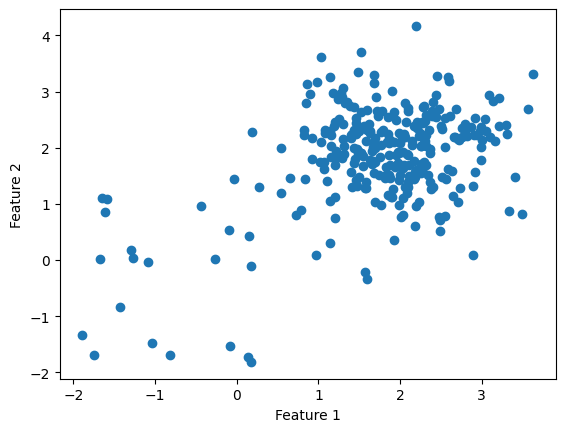

In [8]:
# Visualising the dataset
# create a meshgrid
xx, yy = np.meshgrid(np.linspace(-10, 10, 200),
                     np.linspace(-10, 10, 200))
 
# scatter plot
plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [9]:
# Training the classifier
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)
 
# You can print this to see all the prediction scores
scores_pred = clf.decision_function(X_train)*-1
 
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()
# Counting the number of errors
 
print('The number of prediction errors are ' + str(n_errors))

The number of prediction errors are 14


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyod/models/base.py:410: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


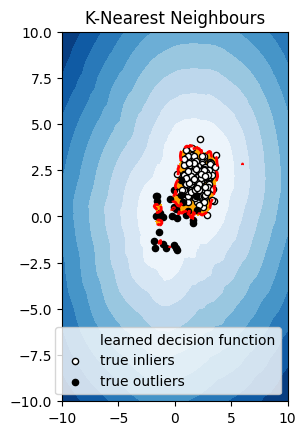

In [10]:
# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)
 
# decision function calculates the raw
# anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
 
# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),
                  threshold, 10), cmap = plt.cm.Blues_r)
 
# draw red contour line where anomaly
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold],
                     linewidths = 2, colors ='red')
 
# fill orange contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')
 
# scatter plot of inliers with white dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],
                                    c ='white', s = 20, edgecolor ='k')
 
# scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],
                                    c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')
 
subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop = matplotlib.font_manager.FontProperties(size = 10),
    loc ='lower right')
 
subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()